In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from netCDF4 import Dataset

In [2]:
# Open the files
path = '/Users/sonnytruong/Desktop/Sonny/01_notebook/ATM_notebook/sonny_wrf/supports/MODIS_cloud_propers/data/'
file_link = sorted(glob.glob(path+'*.nc'))
file_link

['/Users/sonnytruong/Desktop/Sonny/01_notebook/ATM_notebook/sonny_wrf/supports/MODIS_cloud_propers/data/MCD06COSP_M3_MODIS.A2002182.061.2020181145824.nc',
 '/Users/sonnytruong/Desktop/Sonny/01_notebook/ATM_notebook/sonny_wrf/supports/MODIS_cloud_propers/data/MCD06COSP_M3_MODIS.A2002213.061.2020181145836.nc',
 '/Users/sonnytruong/Desktop/Sonny/01_notebook/ATM_notebook/sonny_wrf/supports/MODIS_cloud_propers/data/MCD06COSP_M3_MODIS.A2002244.061.2020181145835.nc']

In [3]:
lat = []
lon = []

ctp_mean = []
ctp_summ = []
cot_stdd = []
cot_pixe = []

for i in range(len(file_link)):
    print('going to open the file #', i)
    #======== Open the first file in the folder
    #======== inside this loop we will access one file at the time
    ncfile = Dataset(file_link[i])
    #======== if we turn on below commend, we will see the GROUP name
    #======== this will print a LONG DESCRIPTION for the group name
    #======== I printed at the end of this file
#     print(ncfile) 
    
    #======== take out the lon and lat
    lat_ = ncfile['latitude']
    lon_ = ncfile['longitude']
    
    #======== TAKE OUT FIRST GROUP WHICH IS "Cloud_Top_Pressure"
    ctp = ncfile['Cloud_Top_Pressure']
    print('Please turn on the print comment below to see: GROUP DESCRIPTION')
#     print(ctp) # if print, will see the VARIABLES (e.g. mean, standard deviation) 
               # inside GROUP "group /Cloud_Optical_Thickness_Ice:""
    #======== this below comment to take out the VARIABLE (e.g. mean and sum) value of THE GROUP Cloud top pressure
    ctp_mean_ = ctp['Mean']
    ctp_summ_ = ctp['Sum']
    print('Please turn on the print comment below to see: VARIABLE DESCRIPTION')
#     print(ctp_mean_) # will see the description of this variable
    
    #==== TAKE OUT SECOND GROUP WHICH IS "Cloud_Optical_Thickness_Ice"
    cot = ncfile['Cloud_Optical_Thickness_Ice']
#     print(cot) # if print, will see the VARIABLES (e.g. mean, standard deviation) 
               # inside GROUP "group /Cloud_Optical_Thickness_Ice:""
    cot_stdd_ = cot['Standard_Deviation']
    cot_pixe_ = cot['Pixel_Counts']
#     print(cot_std_) # will see the description of this variable
    
    # UPTO here we have two groups which are:
    # Cloud_Top_Pressure and Cloud_Optical_Thickness_Ice
    # inside first group Cloud_Top_Pressure, we have variables: mean + sum
    # inside the second group Cloud_Optical_Thickness_Ice: std + pixel count
    
    #NOW WE ARE GOING TO SAVE THE VARIABLES FOR PLOTING
    lat.append(lat_)
    lon.append(lon_)
    
    ctp_mean.append(ctp_mean_)
    ctp_summ.append(ctp_summ_)
    cot_stdd.append(cot_stdd_)
    cot_pixe.append(cot_pixe_)

    del ctp_mean_, cot_stdd_, ctp_summ_, cot_pixe_
    del lat_, lon_
    print(' ')

going to open the file # 0
Please turn on the print comment below to see: GROUP DESCRIPTION
Please turn on the print comment below to see: VARIABLE DESCRIPTION
 
going to open the file # 1
Please turn on the print comment below to see: GROUP DESCRIPTION
Please turn on the print comment below to see: VARIABLE DESCRIPTION
 
going to open the file # 2
Please turn on the print comment below to see: GROUP DESCRIPTION
Please turn on the print comment below to see: VARIABLE DESCRIPTION
 


In [4]:
# we check the shape of this array
ctp_mean[1].shape

(360, 180)

In [5]:
# I rotated so it will be 180 points in the vertical and 360 in the horizontal
rt_cpt_mean = np.rot90(ctp_mean[1])
# Check the shape
rt_cpt_mean.shape

(180, 360)

In [6]:
# making a meshgrid to plot the figure if using MATPLOTLIB
X, Y = np.meshgrid(lon[1], lat[1])
X.shape

(180, 360)

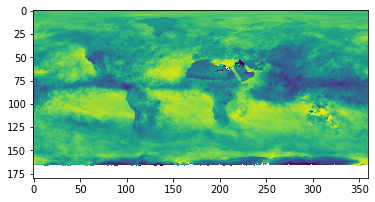

In [7]:
# Here I just plotted the figure quickly
plt.imshow(rt_cpt_mean)

In [8]:
print(ncfile) 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    YAML_config: grid_settings:
  gridsize: 1
  projection: conformal
  lat_in: Latitude
  lon_in: Longitude
  lat_out: Latitude
  lon_out: Longitude
  fill_value: -999

variable_settings:

  - name_in: Solar_Zenith
    name_out: Solar_Zenith
    attributes: 
    - name: long_name
      value: Solar Zenith Angle (Cell to Sun) for Daytime Scenes
    - name: units
      value: degrees
    - name: _FillValue
      value: -999.0
    - name: valid_min
      value: 0.0
    - name: valid_max
      value: 180.0
    - name: scale_factor
      value: 1.0
    - name: add_offset
      value: 0.0
    masks:
    - Mask_Day

  - name_in: Solar_Azimuth
    name_out: Solar_Azimuth
    attributes: 
    - name: long_name
      value: Solar Azimuth Angle (Cell to Sun) for Daytime Scenes
    - name: units
      value: degrees
    - name: _FillValue
      value: -999.0
    - name: valid_min
      value: -180.0
    - name: 